<b>Principal Component Analysis </b>
Mouse | Gene1 | Gene2 | Gene3 | Gene4
--|--| --| --| --
1 | 10 | 6 | 1.2 | 5
2 | 11 | 4 | 9 | 7
3 | 8 | 5 | 10 | 6
4 | 3 | 3 | 2.5 | 2
5 | 1 | 2.8 | 1.3 | 4
6 | 2 | 1 | 2 | 7

If we only measure Gene1 how do I separate the mice?

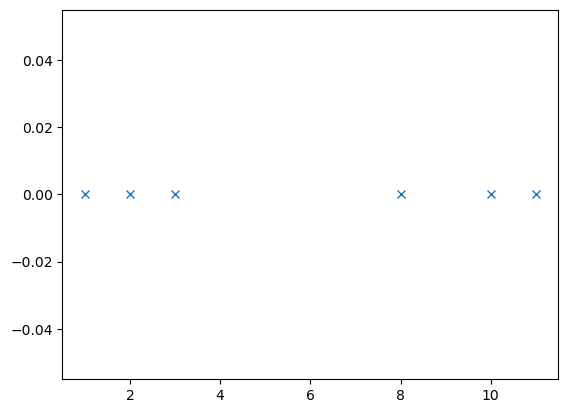

In [1]:
import numpy as np
from matplotlib import pyplot as plt
gene1 = [10, 11, 8, 3, 1, 2]
val = 0
plt.plot(gene1, np.zeros_like(gene1), 'x')

Mice 1, 2, 3 are more similar to eacho ther than they are to mice 4, 5 and 6. Lets measure two genes.

In [2]:
gene2 = [6, 4, 5, 3, 2.8, 1]

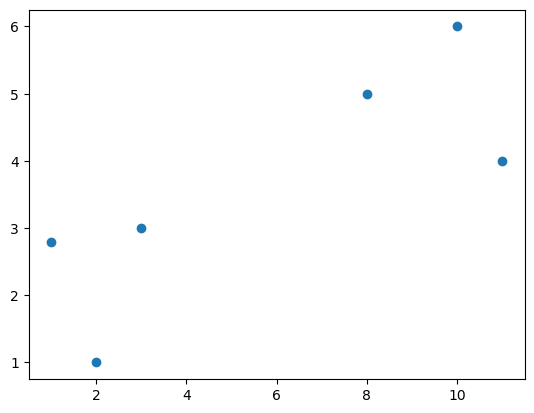

In [3]:
plt.scatter(gene1, gene2)

- PCA can tell is which gene or variable or combination of variables os the most valuable for clustering
- To understand PCA we will a dataset with the first two genes.

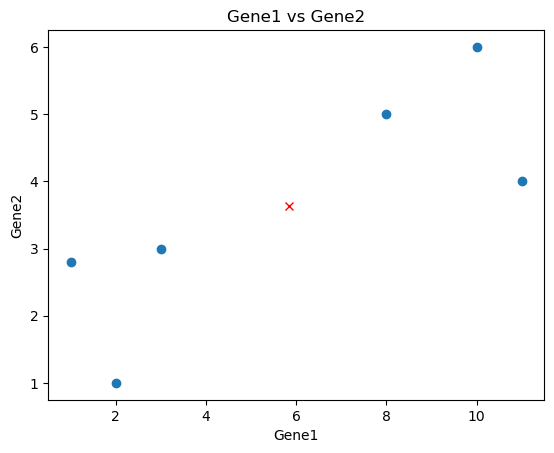

In [4]:
plt.scatter(gene1, gene2)
plt.title("Gene1 vs Gene2")
plt.xlabel("Gene1")
plt.ylabel("Gene2")
gene1average = np.average(gene1)
gene2average = np.average(gene2)
plt.plot(gene1average, gene2average, 'rx')

- We will shift the data so that the centre is at the origin
- We do this by subtracting the average from every point

In [5]:
gene1 = gene1 - gene1average
gene2 = gene2 - gene2average
print(gene1)
print(gene2)

[ 4.16666667  5.16666667  2.16666667 -2.83333333 -4.83333333 -3.83333333]
[ 2.36666667  0.36666667  1.36666667 -0.63333333 -0.83333333 -2.63333333]


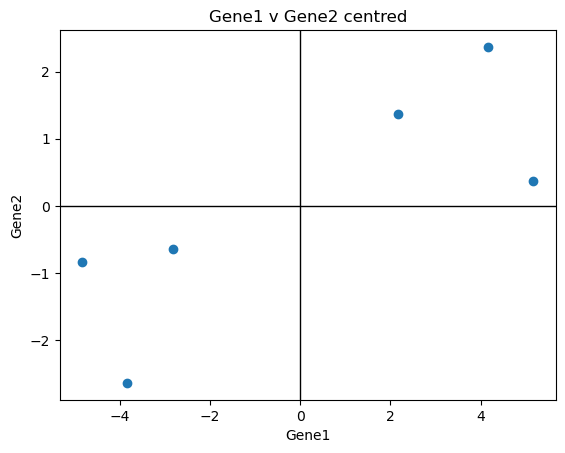

In [6]:
plt.scatter(gene1, gene2)
plt.title("Gene1 v Gene2 centred")
plt.xlabel("Gene1")
plt.ylabel("Gene2")
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

- Shifting the data did not change how the points are positioned relative to each other
- Now that the data centred at the origin we can fit a line to it
- Start with a random line through the origin and rotate until it fits as good as possible
- We need to talk about how PCA decides whether the line is a good fit or not
- Consider a random starting line through the origin
- To quantify how good our line fits the data, PCA will project the data onto the line and then either measure the distances from the data to the line and try to minimise those distances or
- It can try to find the line that maximises the distances from the projected points to the origin
- $a^2 = b^2 + c^2$ since $a$ is fixed as $b$ gets smaller $c$ must get bigger
- PCA can either minimise $b$ or maximise $c$
- Intuitively it is more obvious to minimise $b$... but it is easier to calculate c, the distance from the projected point to the origin, so PCA finds the best line by maximising the sum of squared distances from the projected points to the origin
- Rotate the line to find SS(distances)
- This line is called Principal Component 1 or PC1 for short

In [7]:
from scipy import stats
slope, intercept, _, _ ,_ = stats.linregress(gene1, gene2)
print(slope)
print(intercept)

0.32302284710017576
-1.6964884226316686e-16


- PC1 has slope of 0.323. In otherwords for every 3 units we go along gene1 we go up one unit along the gene2 axis
- This means that the data is mostly spread out along the gene1 axis and only a little spread out along the gene2 axis
- To make PC1 we take 3 parts gene1 and 1 part gene2
- The ratio of gene2 to gene2 tells you that gene1 is more important when it comes to decribing how spread out data is
- PC1 is linear combation of gene1 and gene2
- When you do PCA with Singular Value Decomposition (SVD), the recipe for PC1 is scaled so that its length is one. We need to divide by $\sqrt(10)$
- PC1 = $\frac{3}{\sqrt(10)}gene1 + \frac{1}{\sqrt(10)}gene2$
- The unit vector os called the Singular Vector or the eigenvector of PC1
- The proportions of each gene are called "Loading scores"
- PCA calls the average of SS(distances) for the best fit line the eigenvalue for PC1
- $\frac{SS(distances for PC1)}{n-1}$ = Eigenvalue for PC1
- $\sqrt{SS(distances for PC1)}$ = singular value for PC1
- Because this example is 2D, PC2 is the line through the origin that is perpendicular to PC1
- PC2 = -1gene1 + 3gene2
- Scaling to a unit vector $PC2 = \frac{-1}{\sqrt(10)}gene1 + \frac{3}{\sqrt{10}}gene2$
- For PC2 gene2 is 3 times more important than gene1
- To draw the final PCA plot rotate everything so that PC1 is horizontal. Then we can use the projected points to see where the sample points are in the PCA plot
- Eigenvalues are measures of variation
- For the sake of this example suppose the variation explained by PC1 ois 15 and the variation for PC2 is 3
- Total variation is 18
- This means that PC1 accounts for 15/18 = 83% of the variation around the PCs
- A scree plot is a graphical of what percentage of variance each PC explains

<b>PCA with 3 variables</b>
- Centre the data (want data with mean 0 and standard deviation 1)
- Find the line of best fit that goes through the origin - PC1
- PC1 = 0.62gene1 + 0.15gene2+0.77gene3
- PC2 is next best fitting line that goes through the origin and is at right angles to PC1
- PC2 = 0.77gene1 + 0.62gene2+0.15gene3
- PC3 is the best fitting line through the origin that is at right angles to both PC1 and PC2
- In theory there is one PC per variable but in practice, the number of PCs is either the number of variables or the number of samples, whichever is smaller
- Once we have all of the PCs we can use the eigenvalues to determine the proportion of variation that each PC accounts for
- For example PC1 account for 79%, PC2 15%, PC3 for 6%

In [8]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [9]:
genes = ['gene'+str(i) for i in range(1, 101)]
wt = ['wt'+str(i) for i in range(1, 6)]
ko = ['ko'+str(i) for i in range(1, 6)]

In [10]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)

In [11]:
data

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
gene96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10, 1000), size=5)

In [13]:
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,367,357,330,361,377,512,505,506,532,499
gene2,193,161,190,182,191,617,589,612,610,658
gene3,312,337,338,323,362,873,844,815,855,837
gene4,928,938,940,883,911,880,854,827,920,837
gene5,36,33,32,34,34,235,253,223,225,254


In [14]:
print(data.shape)

(100, 10)


In [15]:
scaled_data = preprocessing.scale(data.T)

In [16]:
scaled_data

array([[-0.87310232, -0.95246984, -1.08506033,  0.91129833, -0.97428924,
        -0.9236216 ,  1.16742849, -1.06539865,  0.64039598,  1.12184177,
         0.96484656,  0.82141683, -2.28187454,  1.15181326, -1.01977457,
         1.25877833,  0.81695866, -1.11923289,  0.5170542 , -0.92789021,
        -0.96142271,  0.62185534, -1.23066448,  1.10465833,  0.80566511,
         1.00367252,  0.94188694,  0.0028575 ,  0.97369649, -0.96094018,
        -1.08555753, -0.76864841, -1.42189676,  1.03621982,  1.00316975,
         0.66944141, -1.27200104, -0.99495113, -0.79550634, -1.7281668 ,
        -1.44323613,  0.96957662,  0.99253032,  1.11351841,  1.18165976,
         0.99848847, -0.99174634, -0.99192802,  0.75400117,  0.82736911,
        -0.55154296,  0.86244586, -0.96141084,  1.42669453, -0.96960181,
        -0.97954422, -0.98438826, -0.87063854,  1.00421362,  1.04922041,
         1.21808416, -1.02608721, -1.36895868,  0.49791522, -0.88526077,
        -0.95012608, -1.02340867,  1.44396962, -0.9

In [17]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

array([90.7,  2.4,  2. ,  1.5,  1.4,  0.8,  0.6,  0.4,  0.3,  0. ])

In [18]:
pca_data

array([[ 9.75553754e+00, -1.98434032e+00, -1.88373052e+00,
        -1.92511424e-01, -1.65074483e+00, -8.40680052e-01,
        -9.43510576e-01,  1.00712936e-01,  3.23693951e-02,
         5.55111512e-16],
       [ 9.28263455e+00,  5.01357814e-01,  2.60581615e+00,
        -9.91070000e-01,  6.39198846e-01, -9.08067056e-01,
        -3.69050113e-01, -6.93090863e-01,  5.52615228e-01,
         9.99200722e-16],
       [ 9.73867815e+00, -5.14070930e-01,  9.12490825e-01,
        -9.33390907e-01, -3.47806357e-01, -4.37643776e-02,
         1.41608793e+00,  9.46048161e-01, -4.64173139e-01,
         8.60422844e-16],
       [ 9.31484802e+00, -1.38488652e+00, -1.10643634e-01,
         9.81345324e-01,  6.91030071e-01,  1.72790705e+00,
         8.15793003e-02, -8.48151129e-01, -3.72912300e-01,
         9.05525654e-16],
       [ 9.51981199e+00,  3.44322100e+00, -1.49313725e+00,
         1.12533077e+00,  6.88778807e-01,  7.45810640e-02,
        -1.88941225e-01,  4.46834531e-01,  2.41124948e-01,
         9.

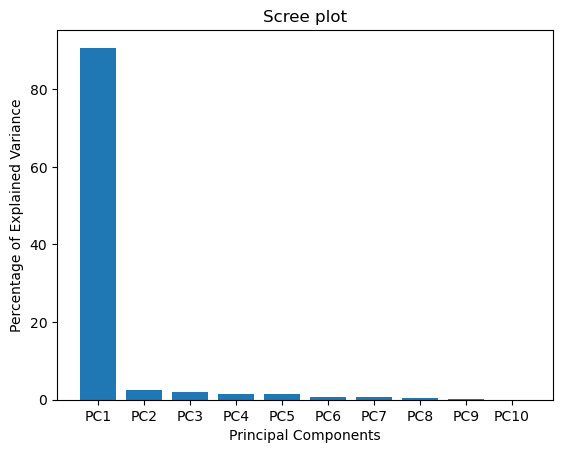

In [19]:
labels=['PC'+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Components")
plt.title("Scree plot")
plt.show()

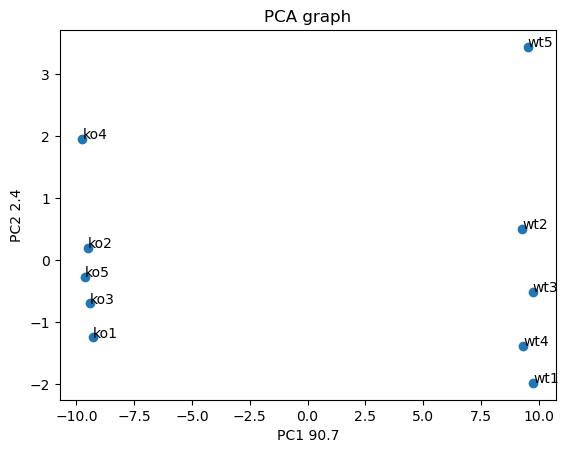

In [20]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel(f'PC1 {per_var[0]}')
plt.ylabel(f'PC2 {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()


pd.set_option('display.max_rows', 1000)
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores

In [24]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
top_10_genes

array(['gene47', 'gene90', 'gene86', 'gene27', 'gene30', 'gene11',
       'gene56', 'gene15', 'gene67', 'gene60'], dtype=object)

<b>PCA on MNIST</b>
- MNIST data has redundant pixels. Getting rid of redundant pixels:
  - Faster training
  - Data visualization is easier

- PCA is a process of figuring out the most important features which are the ones that explain the most variance in the target variable
- Scale features before applying PCA
- Accuracy might drop

In [25]:
import pandas as pd
from sklearn.datasets import load_digits


In [26]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [28]:
dataset


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [29]:
dataset.data.shape

(1797, 64)

In [30]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [31]:
dataset.data[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

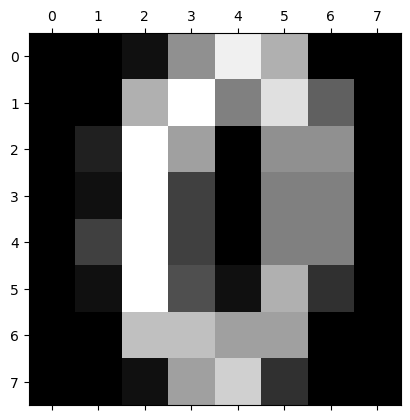

In [38]:
from matplotlib import pyplot as plt
plt.gray()
plt.matshow(dataset.data[10].reshape(8,8))

In [39]:
dataset.target

array([0, 1, 2, ..., 8, 9, 8])

In [40]:
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [44]:
df=pd.DataFrame(dataset.data, columns = dataset.feature_names)
from IPython.display import display
pd.options.display.max_columns = None
display(df)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,16.0,14.0,12.0,16.0,3.0,0.0,0.0,4.0,16.0,6.0,3.0,16.0,4.0,0.0,0.0,0.0,12.0,16.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,4.0,4.0,16.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5.0,0.0,0.0,0.0,5.0,7.0,7.0,16.0,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,16.0,15.0,12.0,16.0,1.0,0.0,0.0,3.0,16.0,7.0,0.0,13.0,6.0,0.0,0.0,4.0,16.0,0.0,0.0,10.0,8.0,0.0,0.0,8.0,16.0,0.0,0.0,14.0,6.0,0.0,0.0,5.0,16.0,7.0,9.0,16.0,5.0,0.0,0.0,1.0,15.0,16.0,16.0,16.0,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,13.0,16.0,8.0,2.0,1.0,0.0,0.0,0.0,16.0,15.0,10.0,16.0,5.0,0.0,0.0,0.0,8.0,16.0,16.0,7.0,0.0,0.0,0.0,0.0,9.0,16.0,16.0,4.0,0.0,0.0,0.0,0.0,16.0,14.0,16.0,15.0,0.0,0.0,0.0,0.0,15.0,15.0,15.0,16.0,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,14.0,16.0,16.0,15.0,1.0,0.0,0.0,4.0,16.0,7.0,3.0,16.0,7.0,0.0,0.0,5.0,16.0,10.0,7.0,16.0,4.0,0.0,0.0,0.0,5.0,14.0,14.0,16.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,2.0,0.0,0.0,0.0,4.0,7.0,7.0,16.0,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [45]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,10.382304,11.979410,10.279354,8.175849,1.846411,0.107958,0.002782,2.601558,9.903172,6.992766,7.097941,7.806344,1.788536,0.050083,0.001113,2.469672,9.091263,8.821369,9.927101,7.551475,2.317752,0.002226,0.0,2.339455,7.667223,9.071786,10.301614,8.744018,2.909293,0.0,0.008904,1.583751,6.881469,7.228158,7.672231,8.236505,3.456316,0.027268,0.007234,0.704508,7.506956,9.539232,9.416249,8.758486,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,5.421456,3.977543,4.782681,6.052960,3.586321,0.827915,0.062368,3.576301,5.690767,5.802662,6.175729,6.197322,3.259870,0.438597,0.033352,3.146532,6.192038,5.882936,6.152093,5.872556,3.686456,0.047140,0.0,3.480372,6.324687,6.268391,5.933490,5.870648,3.537283,0.0,0.145185,2.981816,6.537955,6.441378,6.259511,5.695527,4.330951,0.307356,0.204223,1.746153,5.644496,5.226948,5.302048,6.031154,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,9.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,3.000000,6.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,12.000000,13.000000,11.000000,9.000000,0.000000,0.000000,0.000000,1.000000,12.000000,6.000000,6.000000,8.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,12.000000,7.000000,0.000000,0.000000,0.0,0.000000,8.000000,10.000000

In [46]:
X = df
y = dataset.target

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [51]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 54)

In [52]:
X_pca

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.12875948,
        -0.10836118,  0.01791386],
       [ 0.58898033,  0.9246358 ,  3.92475494, ..., -0.06281057,
        -0.04847131,  0.39530474],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.00678432,
        -0.08145492,  0.31096665],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ..., -0.3719933 ,
         0.60645363, -0.2940029 ],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.03681226,
         0.2276726 ,  0.37771634],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38985211,
         0.1880376 , -0.08888721]])

In [53]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054, 0.08444415, 0.06498408, 0.04860155,
       0.0421412 , 0.03942083, 0.03389381, 0.02998221, 0.02932003,
       0.02781805, 0.02577055, 0.02275303, 0.0222718 , 0.02165229,
       0.01914167, 0.01775547, 0.01638069, 0.0159646 , 0.01489191,
       0.0134797 , 0.01271931, 0.01165837, 0.01057647, 0.00975316,
       0.00944559, 0.00863014, 0.00836643, 0.00797693, 0.00746471,
       0.00725582, 0.00691911, 0.00653909, 0.00640793, 0.00591384,
       0.00571162, 0.00523637, 0.00481808, 0.00453719, 0.00423163,
       0.00406053, 0.00397085, 0.00356493, 0.00340787, 0.00327835,
       0.00311032, 0.00288575, 0.00276489, 0.00259175, 0.00234483,
       0.00218257, 0.00203598, 0.00195512, 0.00183318])

In [54]:
pca.n_components_

54

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9694444444444444

In [57]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(1797, 2)

In [58]:
pca.explained_variance_ratio_

array([0.12033916, 0.09561054])

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5666666666666667

**Advantages and Disadvantages of PCA**
1. **Dimensionality Reduction**: By reducing the number of variables PCA simplifies the analysis, improves performance, and makes it easier to visualise data
2. **Feature selection**: PCA can used for feature selection, which is the process of selecting the most important variables in a dataset. This is useful in machine learning where you can have large numbers of variables and it is difficult to see which ones are the most important.
3. **Data Visualisation**: By reducing the number of variables, PCA can plot high dimensional data in 2 or 3 dimensions, making it easier to interpret
4. **Mutlicolinearity**: PCA can be used to deal with multicolinearity, which is a common problem in regression analysis where two or more independent variables are strongly correlated. PCA can help identify the underlying structure in the data and create new uncorrelated variables that can be used in the regression model
5. **Noise Reduction**: PCA can be used to reduce noise in data. By removing the principal components with low variance, which is assumed to represent noise, PCA can improve the signal to noise ratio and make it eaiser to understand the underlying structure of the data
6. **Data Compression**: PCA can be used for data compression. By representing the data using a smaller number of principal components, which capture most of the variation in the data, PCA can reduce storage requirements and speed up processing
7. **Outlier detection**: PCA can be used for outlier detection. Outliers are points that are significantly different from the other points in the dataset. PCA can identify outliers by looking for data that are far away from other points in the principal component space.

**Disadvantages**
1. **Interpretation of Principal Components**: The principal components created by PCA are linear combinations of the original variables and it is often difficult to interpret them in terms of the original variables. This can make it difficult to explain the results of PCA to other people.
2. **Data Scaling**: PCA is sensitive to the scale of the data. If the data is not properly, then PCA will not work well. It is important to scale the data before doing PCA
3. **Information Loss**: PCA can result in information loss. While PCA reduces the number of variables, it can lead to loss of information. The degree of information loss depends on the number of principal components selected.
4. **Non-linear relationships**: PCA assumes that the relationships between variables are linear. If there are non-linear relationships PCA will not work that well
5. **Computational Complexity**: Computing PCA can be expensive for large datasets. For n points with p features $O(p^2n+p^3)$
6. **Overfitting**: PCA can sometimes result in overfitting. This can happen if too many principal components are used or the model is trained on too small of a dataset